<a href="https://colab.research.google.com/github/MOHAMMADHOSSEIN-JAFARI/Backpain-Spine-Clustering-and-Feature-Selection-/blob/main/unsupervisel_learning_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("corrplot")
install.packages("tidyverse")
install.packages("corrplot")
install.packages("gridExtra")
install.packages("GGally")
install.packages("knitr")
install.packages("stats")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggfortify")
install.packages("factoextra")
install.packages("cluster")
install.packages("devtools")
install.packages("ggbiplot")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Install

In [ ]:
library(tidyverse)
library(corrplot)
library(gridExtra)
library(GGally)
library(knitr)
library(stats)
library(dplyr)
library(ggplot2)
library(ggfortify)
library(factoextra)
library(cluster)
library(devtools)



In [40]:
spine <-read.csv(file= "spine.csv", header = TRUE)


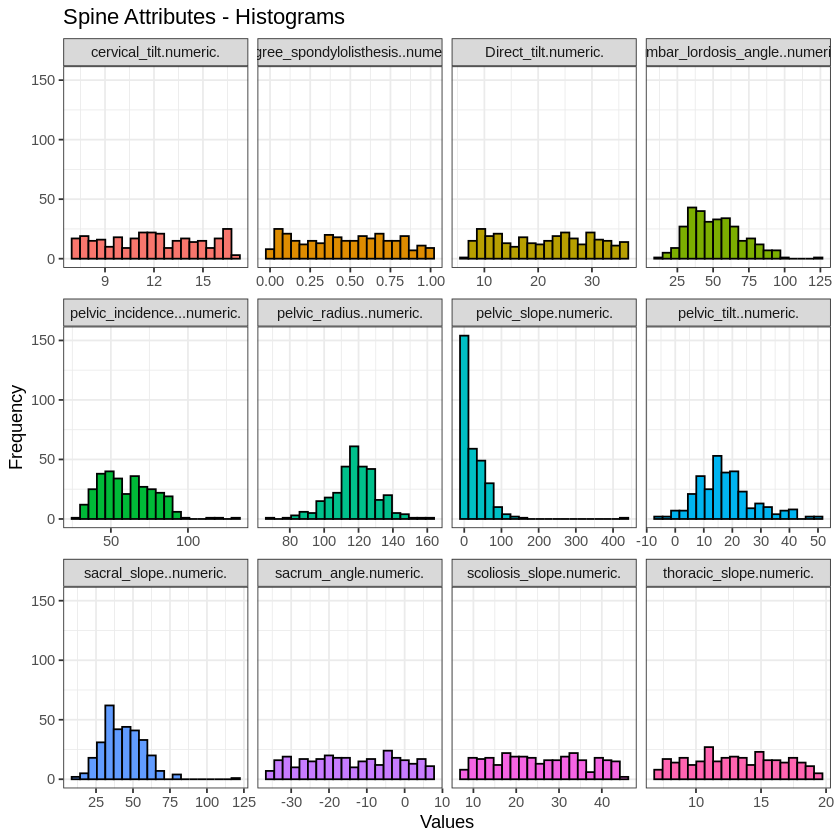

In [41]:
spine %>%
  gather(Attributes, value, 1:12) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_histogram(colour="black", show.legend=FALSE, bins=20) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Frequency",
       title="Spine Attributes - Histograms") +
  theme_bw()

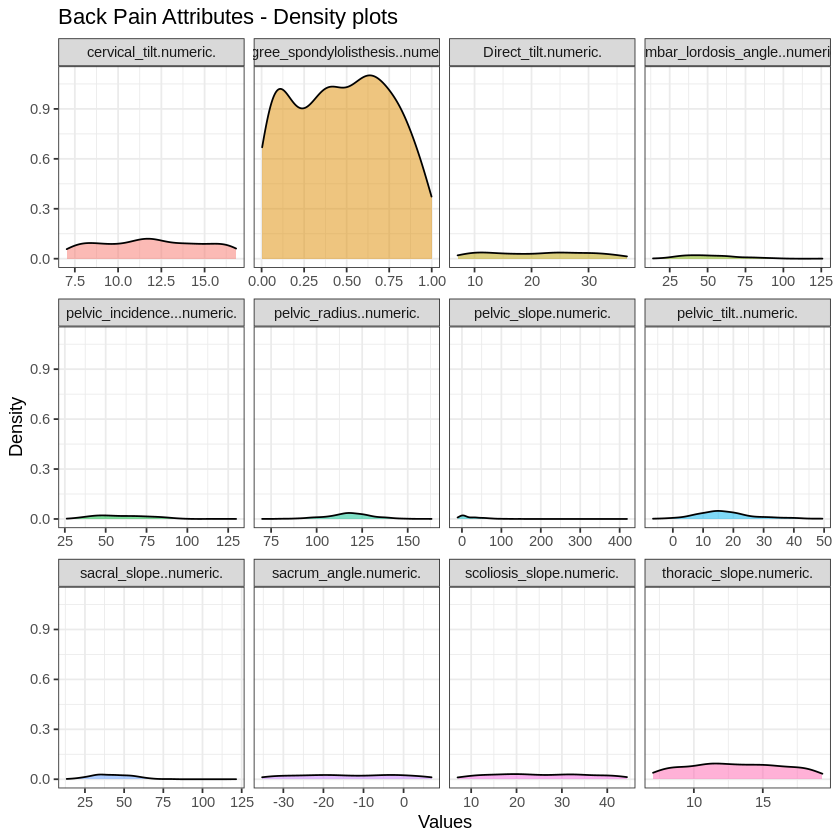

In [42]:
spine %>%
  gather(Attributes, value, 1:12) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_density(colour="black", alpha=0.5, show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Density",
       title="Back Pain Attributes - Density plots") +
  theme_bw()


In [45]:
summary(spine)


 pelvic_incidence...numeric. pelvic_tilt..numeric.
 Min.   : 26.15              Min.   :-6.555       
 1st Qu.: 46.43              1st Qu.:10.667       
 Median : 58.69              Median :16.358       
 Mean   : 60.50              Mean   :17.543       
 3rd Qu.: 72.88              3rd Qu.:22.120       
 Max.   :129.83              Max.   :49.432       
 lumbar_lordosis_angle..numeric. sacral_slope..numeric. pelvic_radius..numeric.
 Min.   : 14.00                  Min.   : 13.37         Min.   : 70.08         
 1st Qu.: 37.00                  1st Qu.: 33.35         1st Qu.:110.71         
 Median : 49.56                  Median : 42.40         Median :118.27         
 Mean   : 51.93                  Mean   : 42.95         Mean   :117.92         
 3rd Qu.: 63.00                  3rd Qu.: 52.70         3rd Qu.:125.47         
 Max.   :125.74                  Max.   :121.43         Max.   :163.07         
 pelvic_slope.numeric. degree_spondylolisthesis..numeric. Direct_tilt.numeric.
 Min

In [46]:
head(spine)


,pelvic_incidence...numeric.,pelvic_tilt..numeric.,lumbar_lordosis_angle..numeric.,sacral_slope..numeric.,pelvic_radius..numeric.,pelvic_slope.numeric.,degree_spondylolisthesis..numeric.,Direct_tilt.numeric.,thoracic_slope.numeric.,cervical_tilt.numeric.,sacrum_angle.numeric.,scoliosis_slope.numeric.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63.02782,22.552586,39.60912,40.47523,98.67292,-0.254400,0.7445035,12.5661,14.5386,15.30468,-28.658501,43.5123
2,39.05695,10.060991,25.01538,28.99596,114.40543,4.564259,0.4151857,12.8874,17.5323,16.78486,-25.530607,16.1102
3,68.83202,22.218482,50.09219,46.61354,105.98514,-3.530317,0.4748892,26.8343,17.4861,16.65897,-29.031888,19.2221
4,69.29701,24.652878,44.31124,44.64413,101.86850,11.211523,0.3693453,23.5603,12.7074,11.42447,-30.470246,18.8329
5,49.71286,9.652075,28.31741,40.06078,108.16872,7.918501,0.5433605,35.4940,15.9546,8.87237,-16.378376,24.9171
6,40.25020,13.921907,25.12495,26.32829,130.32787,2.230652,0.7899929,29.3230,12.0036,10.40462,-1.512209,9.6548


In [49]:
scaled_spine <-scale(spine)

In [51]:
summary(scaled_spine)

 pelvic_incidence...numeric. pelvic_tilt..numeric.
 Min.   :-1.9928             Min.   :-2.4078      
 1st Qu.:-0.8161             1st Qu.:-0.6870      
 Median :-0.1048             Median :-0.1184      
 Mean   : 0.0000             Mean   : 0.0000      
 3rd Qu.: 0.7183             3rd Qu.: 0.4574      
 Max.   : 4.0227             Max.   : 3.1862      
 lumbar_lordosis_angle..numeric. sacral_slope..numeric. pelvic_radius..numeric.
 Min.   :-2.0443                 Min.   :-2.20418       Min.   :-3.5922        
 1st Qu.:-0.8047                 1st Qu.:-0.71569       1st Qu.:-0.5415        
 Median :-0.1277                 Median :-0.04089       Median : 0.0261        
 Mean   : 0.0000                 Mean   : 0.00000       Mean   : 0.0000        
 3rd Qu.: 0.5966                 3rd Qu.: 0.72577       3rd Qu.: 0.5667        
 Max.   : 3.9782                 Max.   : 5.84632       Max.   : 3.3903        
 pelvic_slope.numeric. degree_spondylolisthesis..numeric. Direct_tilt.numeric.
 Min

In [52]:
head(scaled_spine)

pelvic_incidence...numeric.,pelvic_tilt..numeric.,lumbar_lordosis_angle..numeric.,sacral_slope..numeric.,pelvic_radius..numeric.,pelvic_slope.numeric.,degree_spondylolisthesis..numeric.,Direct_tilt.numeric.,thoracic_slope.numeric.,cervical_tilt.numeric.,sacrum_angle.numeric.,scoliosis_slope.numeric.
0.1468489,0.5005594,-0.66410316,-0.1846518,-1.4453100,-0.7069165,0.950093800,-1.0134271,0.4335921,1.1652451,-1.1946557,1.70960432
-1.2438533,-0.7475603,-1.45065531,-1.0398395,-0.2639581,-0.5786208,-0.202226231,-0.9762372,1.3141665,1.6768401,-0.9388075,-0.91246616
0.4835876,0.4671768,-0.09910152,0.2726425,-0.8962365,-0.7941370,0.006682992,0.6380951,1.3005771,1.6333287,-1.2251972,-0.61469259
0.5105645,0.7104138,-0.41067507,0.1259246,-1.2053545,-0.4016390,-0.362627003,0.2591346,-0.1050416,-0.1758728,-1.3428487,-0.65193462
-0.6256363,-0.7884179,-1.27268741,-0.2155274,-0.7322711,-0.4893150,0.246271812,1.6404421,0.8500979,-1.0579558,-0.1901943,-0.06974562
-1.1746253,-0.3617902,-1.44474979,-1.2385764,0.9316562,-0.6407526,1.109266307,0.9261583,-0.3120591,-0.5283638,1.0257941,-1.53017479


**Looking unspervised learning from the observations viewpoints**

**##Hierarchical Clustering**

In [53]:
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

ac <- function(x) {
  agnes(spine, method = x)$ac
}
sapply(m, ac)

average    single  complete      ward 
0.9427764 0.9291417 0.9479284 0.9698246

In [54]:
ad <- function(x) {
  agnes(scaled_spine, method = x)$ac
}
sapply(m, ad)

average    single  complete      ward 
0.8308239 0.7991251 0.8554861 0.9372598

**## Dendrogram with ward scaled data:**

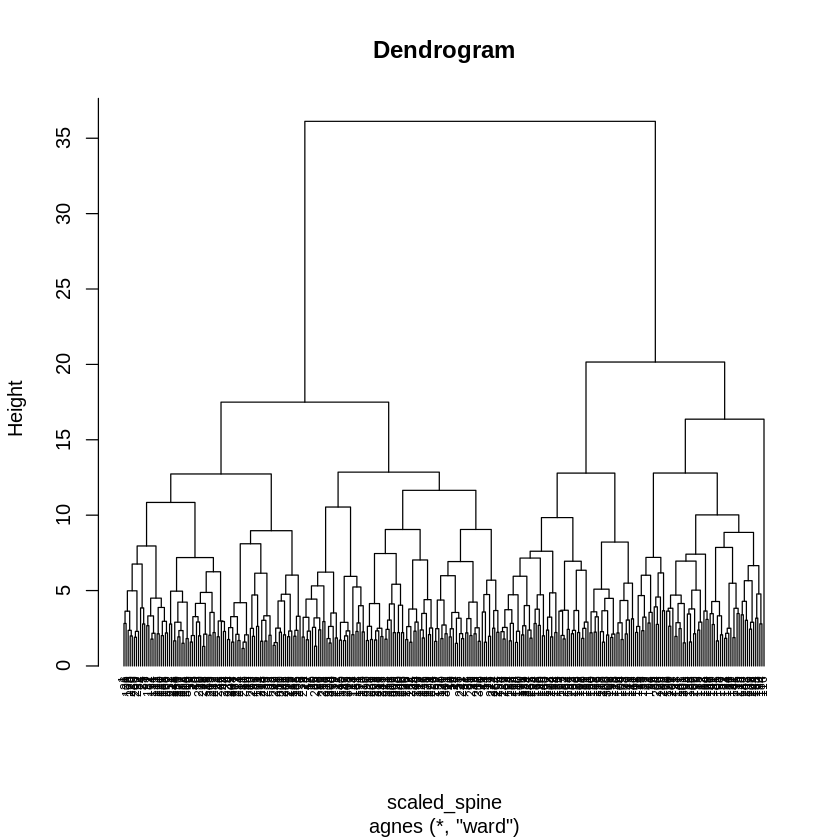

In [55]:
clust <- agnes(scaled_spine, method = "ward")
pltree(clust, cex = 0.6, hang = -1, main = "Dendrogram")




## Dendrogram with ward original data:

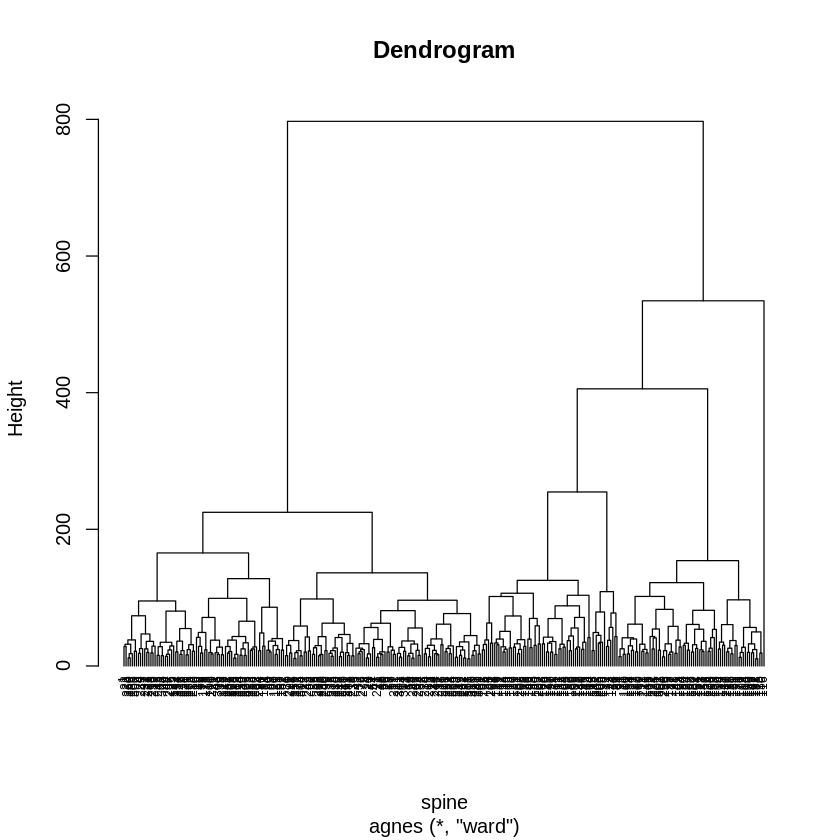

In [56]:
clust <- agnes(spine, method = "ward")
pltree(clust, cex = 0.6, hang = -1, main = "Dendrogram") 

### From now on we work on scaled data: 
## The chosen linkage method can influence a lot the consequences of our clustering. 

# Dendrogram with complete linkage:

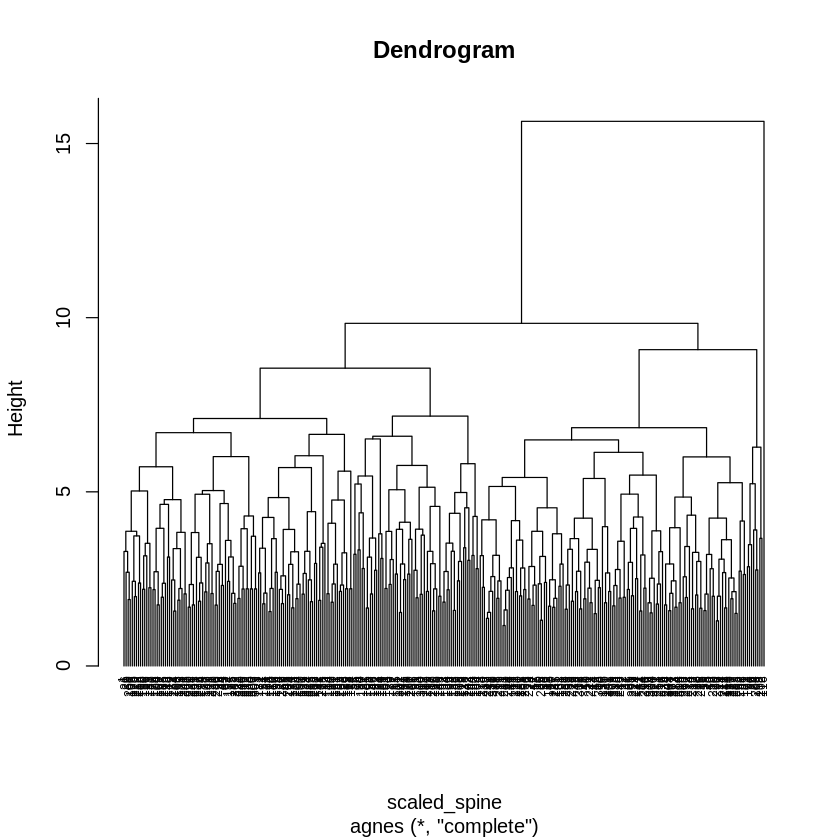

In [57]:
clust <- agnes(scaled_spine, method = "complete")
pltree(clust, cex = 0.6, hang = -1, main = "Dendrogram") 


# Dendrogram with average linkage:

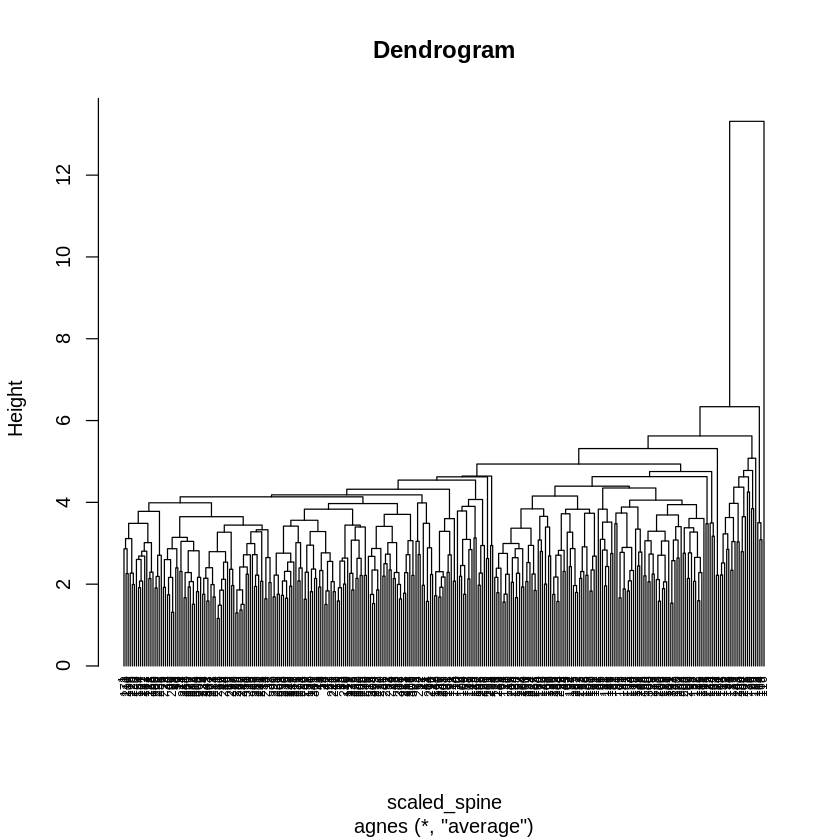

In [58]:
clust <- agnes(scaled_spine, method = "average")
pltree(clust, cex = 0.6, hang = -1, main = "Dendrogram")


#Choosing the optimal number of clusters:

#The Gap Statistic Method

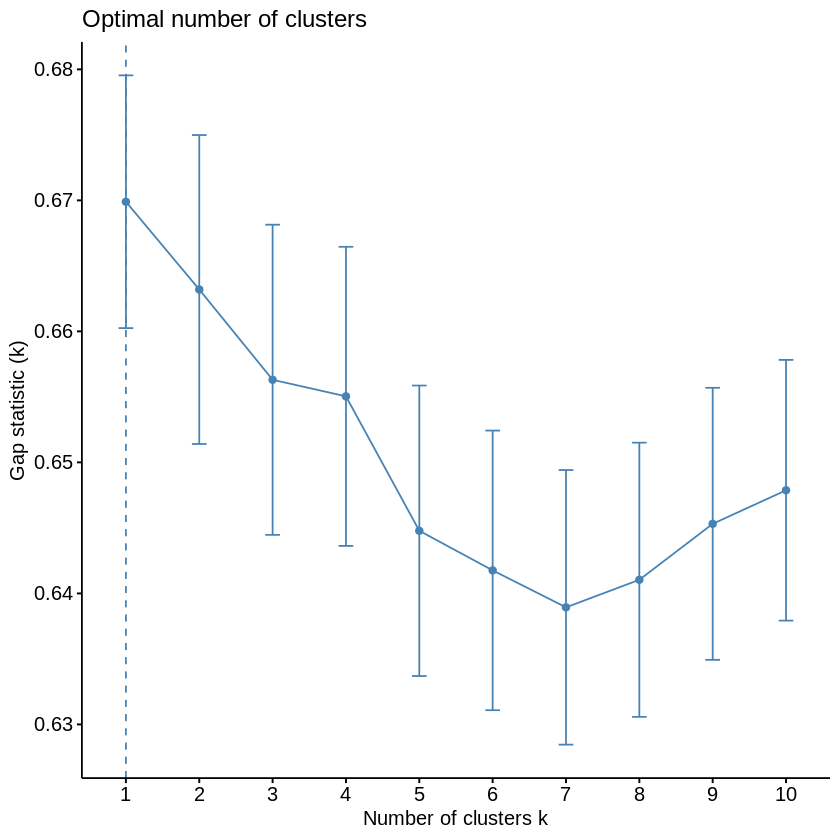

In [60]:
gap_stat <- clusGap(scaled_spine, FUN = hcut, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat) 

### according to this criterion, the optimum number of clusters is 1.

In [62]:
distant_matrix_spine <- dist(spine, method = "euclidean")
distant_matrix_scaled_spine <- dist(scaled_spine, method = "euclidean")


## The following two groups shows how scaling can result in the number of each cluster. 

### Original data:

In [63]:
final_clust <- hclust(distant_matrix_spine, method = "ward.D2" )
groups <- cutree(final_clust, k=2)
table(groups)

groups
  1   2 
173 137 

### Firstly scaled data:

In [64]:
final_clust <- hclust(distant_matrix_scaled_spine, method = "ward.D2" )
groups <- cutree(final_clust, k=2)
table(groups)

groups
  1   2 
182 128 

#### Elbow Method

K-means Method

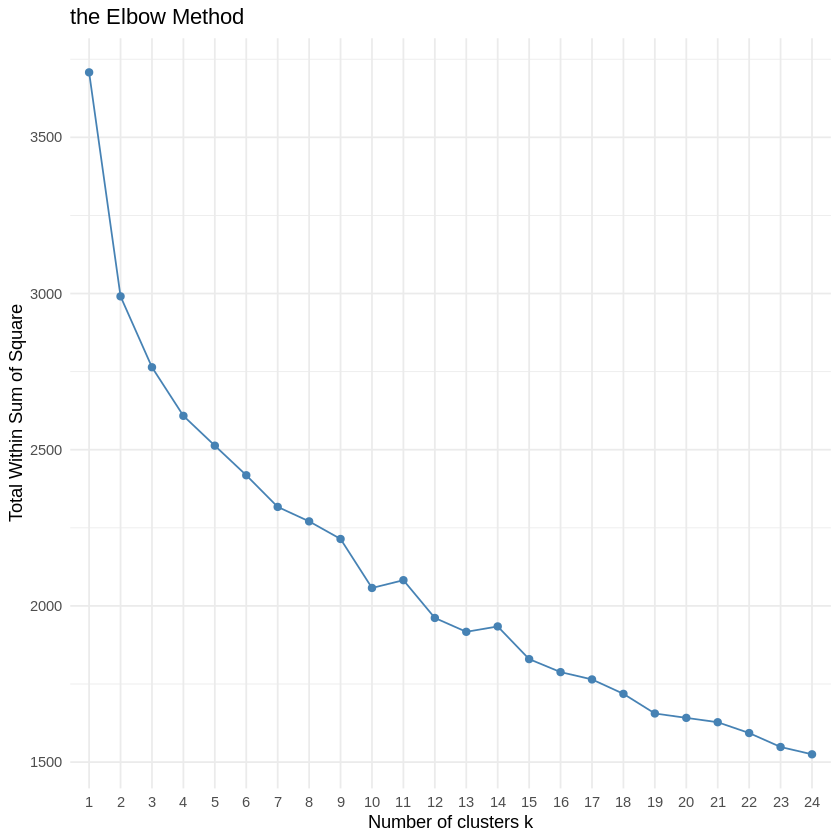

In [65]:
fviz_nbclust(scaled_spine, kmeans ,method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method") ###2 

hcut Method

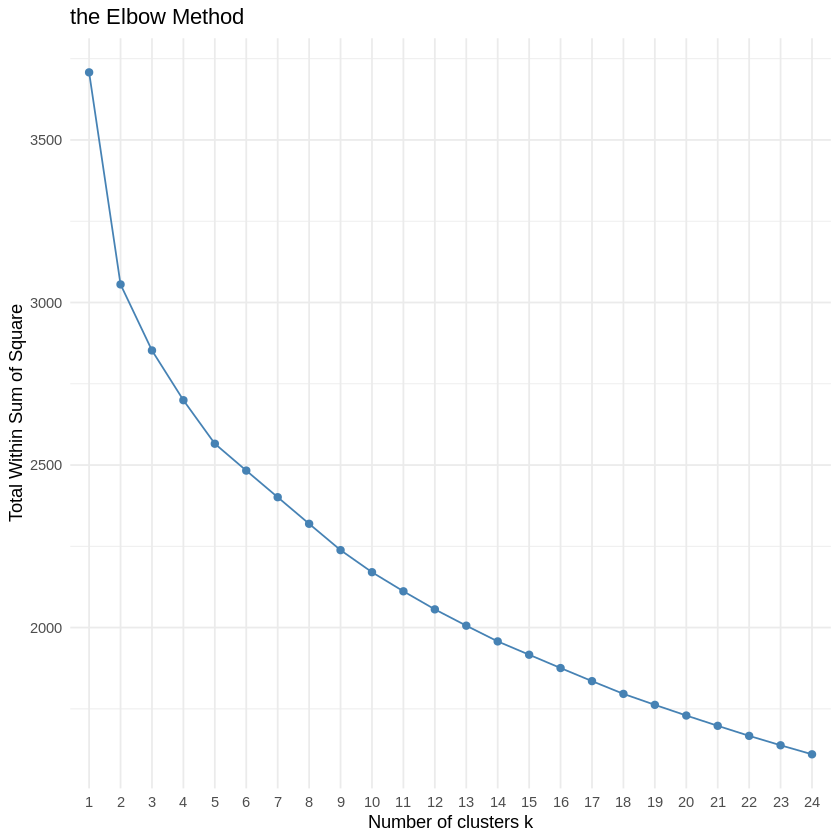

In [66]:
fviz_nbclust(scaled_spine, hcut ,method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")# it is 2 here

## The Silhouette Method

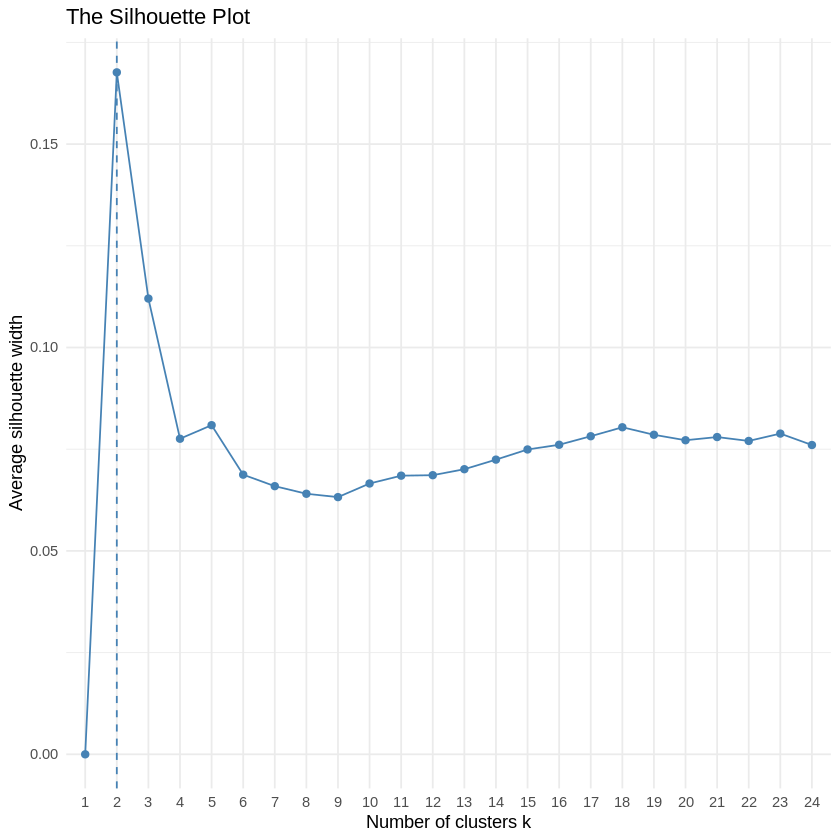

In [67]:
fviz_nbclust(scaled_spine,hcut , method = "silhouette", k.max = 24) + theme_minimal() + ggtitle("The Silhouette Plot")


# Looking Unsupervised learning from the view points of Features:

#PCA

In [68]:
pca <- prcomp(spine, center = TRUE,scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8109 1.1160 1.06911 1.02740 1.01190 0.98370 0.94500
Proportion of Variance 0.2733 0.1038 0.09525 0.08796 0.08533 0.08064 0.07442
Cumulative Proportion  0.2733 0.3771 0.47231 0.56028 0.64560 0.72624 0.80066
                          PC8     PC9   PC10    PC11      PC12
Standard deviation     0.9404 0.85245 0.6841 0.55951 1.915e-10
Proportion of Variance 0.0737 0.06056 0.0390 0.02609 0.000e+00
Cumulative Proportion  0.8744 0.93491 0.9739 1.00000 1.000e+00

#### as it can be seen,  we need more than one components to have a better understanding of the dataset. 

In [69]:
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)


✔  checking for file ‘/tmp/RtmpWAx38o/remotes3f6372f7f3/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid


Attaching package: ‘ggbiplot’


The following object is masked from 

## Biplot 


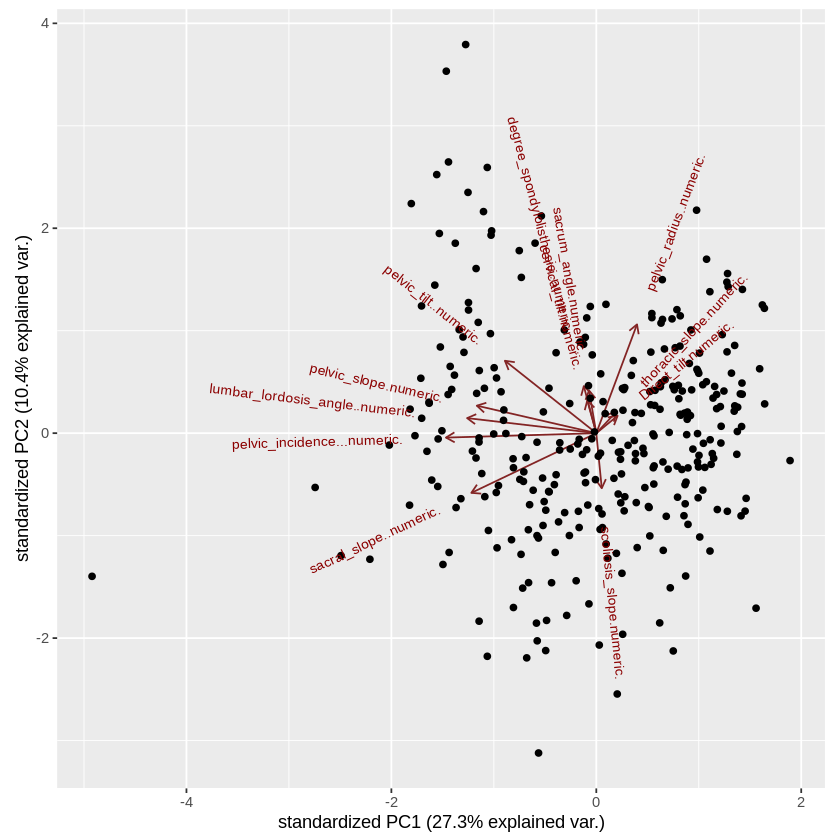

In [70]:
ggbiplot(pca)

## Biplot with all the entries 

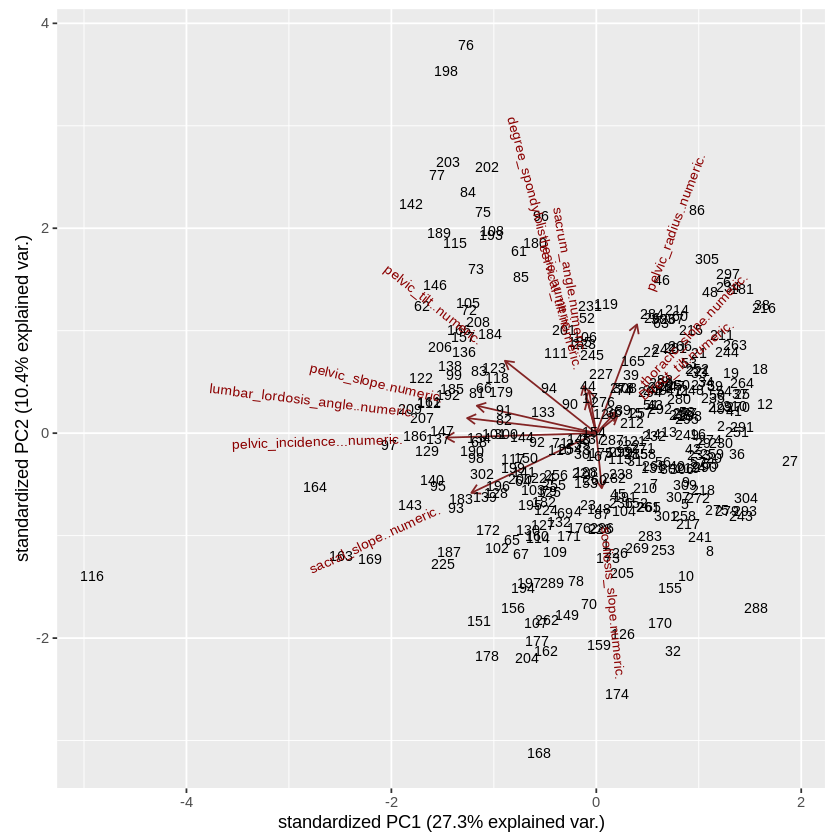

In [71]:
ggbiplot(pca, labels=rownames(spine))